# **Laboratorio_9**






---





In [1]:
from collections import Counter
from copy import copy
import pandas as pd
import numpy as np



*1) mejores y peores casos para los algoritmos de Gale-Shapley e Irving y ejecute en Colab estos algoritmos para esos casos para n = 4 y 40.*

In [2]:
N = 4
  
# This function returns true if  
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1): 
      
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(N): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
  
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
  
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
  
    # Prthe solution 
    #print("Woman ", " Man") 
    #for i in range(N): 
        #print(i + N, "\t", wPartner[i])
    

In [3]:
#Same Function, but printing the stable marriage
def stableMarriage2(prefer): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
  
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
  
    # Prthe solution 
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i])

In [4]:
preferBoys = [[7, 5, 6, 4], [5, 4, 6, 7], 
          [4, 5, 6, 7], [4, 5, 6, 7]]
preferGirls=[[0, 1, 2, 3], [0, 1, 2, 3], 
          [0, 1, 2, 3], [0, 1, 2, 3]]
  
stableMarriage(preferBoys+preferGirls) 

*# N=4*

*To find the best and worst case, we will make the preferences random, executing the algorithm 100 times and taking the 3 best execution times and the 3 worst execution times, for N=4*

In [5]:
from random import sample
from time import time
N=4
man = range(0,4)
woman=range(4,8)
timer=[0,0,0,0,0,0]
prefer=[0,0,0,0,0,0]
for i in range(100):
  preferBoys = [sample(woman,k=4),sample(woman,k=4),sample(woman,k=4),sample(woman,k=4)]
  
  preferGirls = [sample(man,k=4),sample(man,k=4),sample(man,k=4),sample(man,k=4)]
  time_in = time() 
  stableMarriage(preferBoys+preferGirls)
  time_fn = time()
  if (i<5):
    timer[i]=(time_fn-time_in)
    prefer[i]=(preferBoys+preferGirls)
  else :
    j=0
    while j<3:
      if ((time_fn-time_in)<timer[j]):
        timer[j]=time_fn-time_in
        prefer[j]=preferBoys+preferGirls
        break
      if ((time_fn-time_in)>timer[j+3]):
        timer[j+3]=time_fn-time_in
        prefer[j+3]=preferBoys+preferGirls
        break
      j+=1
print(timer)
print(prefer)


[3.5762786865234375e-06, 3.5762786865234375e-06, 3.814697265625e-06, 2.8848648071289062e-05, 1.811981201171875e-05, 1.71661376953125e-05]
[[[4, 7, 5, 6], [6, 7, 5, 4], [5, 6, 4, 7], [7, 5, 6, 4], [0, 2, 3, 1], [2, 0, 3, 1], [0, 1, 2, 3], [0, 3, 2, 1]], [[6, 5, 4, 7], [5, 7, 4, 6], [4, 7, 6, 5], [7, 6, 4, 5], [0, 1, 3, 2], [1, 2, 3, 0], [1, 3, 0, 2], [1, 0, 2, 3]], [[4, 6, 7, 5], [5, 4, 7, 6], [6, 4, 7, 5], [7, 4, 6, 5], [1, 0, 2, 3], [1, 0, 3, 2], [3, 0, 2, 1], [0, 3, 1, 2]], [[7, 4, 6, 5], [7, 6, 5, 4], [7, 4, 6, 5], [7, 6, 5, 4], [3, 2, 1, 0], [2, 1, 3, 0], [3, 0, 2, 1], [1, 0, 3, 2]], [[4, 5, 7, 6], [6, 5, 7, 4], [4, 6, 7, 5], [4, 6, 5, 7], [1, 3, 0, 2], [3, 2, 1, 0], [1, 0, 3, 2], [0, 2, 1, 3]], [[5, 4, 7, 6], [4, 5, 7, 6], [7, 5, 4, 6], [5, 7, 6, 4], [2, 3, 0, 1], [3, 1, 2, 0], [2, 3, 0, 1], [3, 0, 1, 2]]]


*Mejores tiempos para N=4*


In [6]:
print(timer[0])
preferMens=prefer[0][:N]
preferGirls=prefer[0][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[0])
%time


3.5762786865234375e-06
PreferBoys =  [[4, 7, 5, 6], [6, 7, 5, 4], [5, 6, 4, 7], [7, 5, 6, 4]]
PreferGirls =  [[0, 2, 3, 1], [2, 0, 3, 1], [0, 1, 2, 3], [0, 3, 2, 1]]
Woman   Man
4 	 0
5 	 2
6 	 1
7 	 3
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs


In [7]:
print(timer[1])
preferMens=prefer[1][:N]
preferGirls=prefer[1][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[1])
%time

3.5762786865234375e-06
PreferBoys =  [[6, 5, 4, 7], [5, 7, 4, 6], [4, 7, 6, 5], [7, 6, 4, 5]]
PreferGirls =  [[0, 1, 3, 2], [1, 2, 3, 0], [1, 3, 0, 2], [1, 0, 2, 3]]
Woman   Man
4 	 2
5 	 1
6 	 0
7 	 3
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


In [8]:
print(timer[2])
preferMens=prefer[2][:N]
preferGirls=prefer[2][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[2])
%time

3.814697265625e-06
PreferBoys =  [[4, 6, 7, 5], [5, 4, 7, 6], [6, 4, 7, 5], [7, 4, 6, 5]]
PreferGirls =  [[1, 0, 2, 3], [1, 0, 3, 2], [3, 0, 2, 1], [0, 3, 1, 2]]
Woman   Man
4 	 0
5 	 1
6 	 2
7 	 3
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


*Peores tiempos para N=4*





In [9]:
print(timer[3])
preferMens=prefer[3][:N]
preferGirls=prefer[3][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[3])
%time

2.8848648071289062e-05
PreferBoys =  [[7, 4, 6, 5], [7, 6, 5, 4], [7, 4, 6, 5], [7, 6, 5, 4]]
PreferGirls =  [[3, 2, 1, 0], [2, 1, 3, 0], [3, 0, 2, 1], [1, 0, 3, 2]]
Woman   Man
4 	 2
5 	 0
6 	 3
7 	 1
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [10]:
print(timer[4])
preferMens=prefer[4][:N]
preferGirls=prefer[4][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[4])
%time

1.811981201171875e-05
PreferBoys =  [[4, 5, 7, 6], [6, 5, 7, 4], [4, 6, 7, 5], [4, 6, 5, 7]]
PreferGirls =  [[1, 3, 0, 2], [3, 2, 1, 0], [1, 0, 3, 2], [0, 2, 1, 3]]
Woman   Man
4 	 3
5 	 0
6 	 1
7 	 2
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [11]:
print(timer[5])
preferMens=prefer[5][:N]
preferGirls=prefer[5][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[5])
%time

1.71661376953125e-05
PreferBoys =  [[5, 4, 7, 6], [4, 5, 7, 6], [7, 5, 4, 6], [5, 7, 6, 4]]
PreferGirls =  [[2, 3, 0, 1], [3, 1, 2, 0], [2, 3, 0, 1], [3, 0, 1, 2]]
Woman   Man
4 	 2
5 	 3
6 	 1
7 	 0
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.53 µs


 *N=40*

*# To find the best and worst case, we will make the preferences random, executing the algorithm 100 times and taking the 3 best execution times and the 3 worst execution times, for N=40*

In [12]:
N = 40
def wPrefersM1OverM(prefer, w, m, m1):   
    for i in range(N):
        if (prefer[w][i] == m1): 
            return True
        if (prefer[w][i] == m): 
            return False

def stableMarriage(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N
     
    while (freeCount > 0):
        
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    
def stableMarriage2(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N     
    while (freeCount > 0): 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i])


In [13]:
from random import sample
from time import time
N=40
man = range(0,40)
woman=range(40,80)
timer=[0,0,0,0,0,0]
prefer=[0,0,0,0,0,0]
for i in range(1000):
  preferBoys = [sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40)]
  
  preferGirls = [sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40)]
  time_in = time() 
  stableMarriage(preferBoys+preferGirls)
  time_fn = time()
  if (i<5):
    timer[i]=(time_fn-time_in)
    prefer[i]=(preferBoys+preferGirls)
  else :
    j=0
    while j<3:
      if ((time_fn-time_in)<timer[j]):
        timer[j]=time_fn-time_in
        prefer[j]=preferBoys+preferGirls
        break
      if ((time_fn-time_in)>timer[j+3]):
        timer[j+3]=time_fn-time_in
        prefer[j+3]=preferBoys+preferGirls
        break
      j+=1
print(timer)
print(prefer)

[0.00018358230590820312, 0.0001957416534423828, 0.0002422332763671875, 0.0026383399963378906, 0.0014264583587646484, 0.001201629638671875]
[[[51, 71, 57, 41, 69, 63, 43, 77, 73, 72, 78, 48, 45, 44, 64, 76, 61, 79, 47, 70, 65, 67, 75, 62, 49, 60, 58, 50, 68, 55, 59, 52, 46, 66, 74, 53, 40, 56, 42, 54], [71, 54, 61, 46, 67, 45, 62, 63, 64, 44, 43, 77, 68, 75, 58, 51, 73, 65, 70, 55, 66, 57, 69, 41, 72, 59, 48, 47, 60, 79, 49, 40, 42, 76, 53, 50, 52, 56, 78, 74], [77, 46, 43, 57, 53, 41, 68, 72, 58, 61, 44, 51, 79, 42, 45, 73, 54, 59, 63, 48, 50, 78, 52, 75, 55, 56, 62, 64, 47, 40, 70, 67, 60, 66, 76, 49, 71, 65, 74, 69], [66, 65, 76, 71, 50, 62, 43, 56, 68, 51, 75, 60, 58, 69, 70, 79, 73, 55, 48, 41, 78, 63, 47, 49, 54, 64, 46, 59, 77, 44, 53, 72, 57, 45, 67, 52, 40, 74, 61, 42], [56, 52, 54, 63, 69, 51, 72, 55, 73, 62, 44, 68, 43, 53, 40, 77, 71, 64, 70, 46, 45, 41, 76, 49, 48, 75, 58, 59, 65, 42, 60, 66, 67, 57, 47, 61, 50, 79, 74, 78], [76, 62, 79, 73, 58, 56, 50, 63, 60, 66, 53, 57, 

*Mejores tiempos para N=40*

In [14]:
print(timer[0])
preferMens=prefer[0][:N]
preferGirls=prefer[0][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[0])
%time

0.00018358230590820312
PreferBoys =  [[51, 71, 57, 41, 69, 63, 43, 77, 73, 72, 78, 48, 45, 44, 64, 76, 61, 79, 47, 70, 65, 67, 75, 62, 49, 60, 58, 50, 68, 55, 59, 52, 46, 66, 74, 53, 40, 56, 42, 54], [71, 54, 61, 46, 67, 45, 62, 63, 64, 44, 43, 77, 68, 75, 58, 51, 73, 65, 70, 55, 66, 57, 69, 41, 72, 59, 48, 47, 60, 79, 49, 40, 42, 76, 53, 50, 52, 56, 78, 74], [77, 46, 43, 57, 53, 41, 68, 72, 58, 61, 44, 51, 79, 42, 45, 73, 54, 59, 63, 48, 50, 78, 52, 75, 55, 56, 62, 64, 47, 40, 70, 67, 60, 66, 76, 49, 71, 65, 74, 69], [66, 65, 76, 71, 50, 62, 43, 56, 68, 51, 75, 60, 58, 69, 70, 79, 73, 55, 48, 41, 78, 63, 47, 49, 54, 64, 46, 59, 77, 44, 53, 72, 57, 45, 67, 52, 40, 74, 61, 42], [56, 52, 54, 63, 69, 51, 72, 55, 73, 62, 44, 68, 43, 53, 40, 77, 71, 64, 70, 46, 45, 41, 76, 49, 48, 75, 58, 59, 65, 42, 60, 66, 67, 57, 47, 61, 50, 79, 74, 78], [76, 62, 79, 73, 58, 56, 50, 63, 60, 66, 53, 57, 47, 72, 75, 67, 69, 70, 40, 61, 74, 42, 78, 41, 65, 59, 48, 55, 71, 46, 43, 44, 49, 52, 64, 54, 45, 77,

In [15]:
print(timer[1])
preferMens=prefer[1][:N]
preferGirls=prefer[1][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[1])
%time

0.0001957416534423828
PreferBoys =  [[46, 57, 79, 52, 71, 43, 60, 64, 76, 72, 68, 73, 70, 63, 58, 56, 50, 66, 48, 41, 65, 55, 44, 42, 45, 61, 75, 47, 54, 62, 53, 51, 74, 49, 69, 67, 78, 40, 59, 77], [50, 63, 60, 49, 44, 45, 57, 64, 76, 54, 55, 65, 47, 70, 68, 72, 40, 59, 51, 48, 46, 69, 43, 41, 67, 66, 61, 56, 79, 58, 53, 75, 74, 77, 62, 42, 73, 52, 71, 78], [51, 42, 47, 41, 59, 64, 61, 73, 43, 63, 69, 56, 52, 50, 49, 40, 72, 77, 65, 71, 66, 48, 46, 67, 57, 62, 70, 76, 45, 78, 54, 58, 53, 60, 74, 68, 79, 75, 55, 44], [59, 70, 77, 40, 61, 42, 73, 71, 76, 53, 74, 41, 66, 43, 69, 60, 75, 46, 63, 56, 65, 72, 55, 78, 45, 52, 50, 58, 48, 64, 44, 51, 49, 68, 54, 57, 79, 62, 47, 67], [75, 49, 70, 68, 74, 56, 62, 50, 47, 54, 77, 71, 48, 45, 60, 78, 53, 57, 58, 43, 65, 67, 40, 66, 42, 59, 44, 52, 72, 51, 61, 69, 64, 46, 55, 73, 41, 63, 79, 76], [52, 62, 70, 40, 57, 46, 56, 71, 76, 64, 74, 41, 69, 42, 53, 54, 65, 44, 72, 43, 78, 48, 51, 77, 45, 63, 47, 50, 79, 67, 49, 60, 73, 55, 75, 61, 59, 58, 

In [16]:
print(timer[2])
preferMens=prefer[2][:N]
preferGirls=prefer[2][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[2])
%time

0.0002422332763671875
PreferBoys =  [[59, 53, 58, 57, 64, 79, 61, 42, 43, 48, 51, 76, 72, 75, 67, 66, 47, 45, 44, 40, 46, 50, 77, 41, 69, 78, 74, 68, 60, 63, 49, 73, 55, 65, 71, 62, 70, 52, 56, 54], [48, 43, 56, 74, 77, 59, 68, 49, 70, 41, 79, 78, 46, 55, 64, 63, 42, 51, 50, 47, 75, 58, 67, 40, 76, 71, 73, 61, 62, 66, 44, 69, 52, 60, 72, 54, 57, 53, 45, 65], [40, 56, 71, 68, 60, 73, 61, 50, 64, 69, 76, 79, 52, 41, 46, 77, 65, 75, 72, 54, 47, 63, 43, 74, 48, 49, 59, 44, 57, 70, 55, 53, 58, 42, 78, 66, 51, 67, 45, 62], [40, 64, 54, 42, 79, 52, 62, 49, 45, 70, 53, 78, 43, 63, 61, 77, 66, 41, 72, 65, 76, 46, 69, 50, 75, 56, 55, 48, 73, 59, 44, 67, 58, 68, 60, 74, 51, 47, 71, 57], [69, 58, 47, 41, 77, 60, 43, 44, 55, 65, 54, 42, 70, 71, 56, 63, 78, 64, 48, 79, 72, 57, 50, 67, 51, 74, 49, 59, 53, 45, 62, 68, 75, 46, 61, 73, 52, 66, 40, 76], [74, 54, 50, 70, 76, 57, 72, 53, 77, 65, 63, 44, 52, 75, 43, 64, 59, 51, 42, 55, 48, 78, 45, 61, 46, 68, 40, 49, 41, 66, 60, 73, 69, 79, 67, 62, 47, 58, 

*Peores tiempos para N=40*

In [17]:
print(timer[3])
preferMens=prefer[3][:N]
preferGirls=prefer[3][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[3])
%time

0.0026383399963378906
PreferBoys =  [[75, 68, 56, 52, 71, 70, 69, 63, 42, 51, 45, 72, 62, 78, 73, 55, 77, 48, 66, 60, 59, 50, 79, 74, 57, 46, 64, 53, 65, 58, 67, 54, 41, 76, 61, 44, 49, 43, 40, 47], [40, 45, 47, 73, 54, 69, 76, 70, 63, 71, 74, 44, 66, 48, 42, 60, 61, 41, 46, 78, 64, 53, 75, 68, 79, 72, 50, 43, 57, 67, 65, 77, 56, 51, 58, 49, 55, 59, 62, 52], [57, 52, 44, 77, 70, 53, 40, 55, 65, 46, 50, 63, 43, 74, 67, 59, 56, 78, 48, 47, 51, 49, 68, 66, 79, 72, 41, 75, 54, 76, 64, 69, 73, 42, 58, 45, 62, 60, 61, 71], [70, 64, 75, 44, 68, 42, 51, 45, 65, 48, 40, 71, 66, 53, 73, 72, 43, 46, 76, 47, 57, 77, 60, 49, 41, 54, 52, 56, 63, 61, 59, 67, 62, 79, 78, 69, 50, 58, 55, 74], [48, 58, 51, 43, 75, 45, 62, 52, 76, 73, 41, 46, 74, 54, 71, 65, 69, 55, 64, 53, 42, 47, 78, 56, 77, 57, 70, 61, 59, 49, 67, 63, 40, 66, 72, 50, 68, 44, 79, 60], [66, 75, 61, 78, 69, 41, 62, 55, 49, 57, 77, 43, 54, 60, 53, 56, 74, 52, 72, 51, 64, 63, 46, 58, 65, 47, 50, 48, 45, 40, 44, 71, 67, 76, 79, 59, 73, 70, 

In [18]:
print(timer[4])
preferMens=prefer[4][:N]
preferGirls=prefer[4][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[4])
%time

0.0014264583587646484
PreferBoys =  [[64, 56, 44, 75, 57, 48, 68, 65, 78, 76, 70, 50, 79, 73, 42, 41, 47, 54, 58, 74, 53, 51, 63, 45, 62, 77, 55, 40, 69, 71, 66, 72, 49, 67, 43, 46, 59, 61, 52, 60], [41, 62, 60, 69, 76, 74, 42, 52, 53, 46, 40, 72, 68, 58, 77, 70, 61, 65, 43, 48, 49, 59, 55, 63, 79, 78, 50, 44, 71, 75, 45, 64, 54, 66, 57, 47, 67, 51, 56, 73], [71, 52, 42, 41, 79, 63, 50, 65, 77, 45, 76, 62, 58, 55, 57, 64, 70, 54, 67, 51, 47, 48, 56, 69, 78, 46, 75, 59, 53, 49, 74, 60, 43, 73, 44, 68, 61, 66, 40, 72], [50, 71, 68, 58, 78, 72, 57, 75, 48, 63, 60, 43, 47, 46, 55, 77, 40, 79, 65, 59, 41, 44, 45, 49, 62, 76, 51, 64, 54, 70, 74, 42, 69, 52, 61, 67, 73, 53, 56, 66], [75, 58, 65, 76, 70, 60, 72, 49, 56, 62, 50, 79, 61, 69, 55, 47, 74, 78, 64, 71, 46, 63, 43, 44, 52, 41, 77, 59, 45, 40, 67, 51, 68, 48, 54, 57, 66, 53, 42, 73], [58, 50, 45, 44, 65, 56, 49, 54, 48, 59, 73, 63, 68, 53, 52, 74, 43, 75, 72, 51, 47, 42, 71, 55, 66, 70, 77, 57, 62, 69, 67, 46, 78, 76, 64, 40, 60, 41, 

In [19]:
print(timer[5])
preferMens=prefer[5][:N]
preferGirls=prefer[5][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[5])
%time

0.001201629638671875
PreferBoys =  [[62, 75, 44, 45, 47, 50, 72, 67, 52, 55, 78, 56, 41, 74, 61, 42, 58, 49, 64, 40, 63, 76, 43, 57, 60, 65, 51, 77, 66, 54, 69, 53, 59, 79, 68, 73, 46, 71, 48, 70], [62, 71, 54, 72, 78, 61, 43, 77, 56, 64, 44, 69, 47, 45, 48, 53, 51, 67, 68, 57, 63, 50, 55, 40, 49, 46, 75, 58, 76, 52, 41, 42, 73, 70, 65, 59, 74, 79, 60, 66], [40, 53, 42, 54, 65, 68, 52, 73, 47, 74, 64, 56, 72, 57, 61, 51, 43, 69, 48, 60, 71, 66, 50, 49, 58, 70, 59, 67, 63, 78, 41, 75, 62, 55, 46, 44, 76, 77, 45, 79], [40, 79, 76, 43, 57, 48, 41, 66, 51, 46, 72, 71, 74, 44, 58, 65, 63, 77, 52, 59, 75, 64, 49, 45, 60, 55, 54, 69, 56, 61, 62, 70, 47, 53, 68, 73, 50, 67, 42, 78], [79, 66, 78, 56, 68, 63, 48, 43, 67, 54, 60, 75, 74, 42, 50, 44, 41, 64, 51, 46, 61, 52, 45, 77, 73, 70, 69, 49, 76, 53, 57, 71, 59, 40, 62, 65, 72, 58, 47, 55], [70, 58, 73, 77, 66, 40, 42, 65, 69, 72, 64, 61, 74, 53, 45, 59, 68, 54, 55, 44, 67, 49, 76, 60, 41, 56, 57, 62, 51, 63, 43, 78, 50, 47, 71, 75, 52, 48, 7

*2)  Ejecute el algoritmo Gale-Shapley 100 veces usando permutaciones aleatorias como listas de preferencias para n = 4 y 40. Encuentre el número mínimo, máximo y promedio de iteraciones y trace la distribución del número de iteraciones.* 

In [20]:
N = 4
def wPrefersM1OverM(prefer, w, m, m1):   
    for i in range(N):
        if (prefer[w][i] == m1): 
            return True
        if (prefer[w][i] == m): 
            return False

def stableMarriage(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N
    iterator=0  
    while (freeCount > 0):
        iterator+=1
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    return iterator

In [21]:
from random import sample

N=4
man = range(0,4)
woman=range(4,8)
iterator=[]
mean=0
for i in range(100):
  preferBoys = [sample(woman,k=4),sample(woman,k=4),sample(woman,k=4),sample(woman,k=4)]
  
  preferGirls = [sample(man,k=4),sample(man,k=4),sample(man,k=4),sample(man,k=4)]  
  a=stableMarriage(preferBoys+preferGirls)
  mean+=a
  iterator.append(a) 
  
iterator.sort()
print(iterator)
print(mean/100)

N=40
man = range(0,40)
woman=range(40,80)
iterator2=[]
mean2=0
for i in range(100):
  preferBoys = [sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40)]
  preferGirls = [sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40)]
  a2=stableMarriage(preferBoys+preferGirls)
  mean2+=a2
  iterator2.append(a2) 
  
iterator2.sort()
print(iterator2)
print(mean2/100)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 9]
5.16
[59, 60, 61, 62, 63, 63, 64, 65, 67, 68, 68, 69, 69, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 76, 76, 76, 76, 76, 77, 77, 77, 78, 78, 78, 78, 78, 79, 79, 79, 80, 80, 80, 81, 81, 81, 81, 81, 82, 82, 82, 83, 84, 84, 84, 84, 84, 84, 85, 85, 85, 86, 87, 87, 88, 88, 88, 89, 91, 92, 92, 93, 93, 94, 94, 95, 95, 95, 95, 96, 98, 98, 108, 116]
79.24


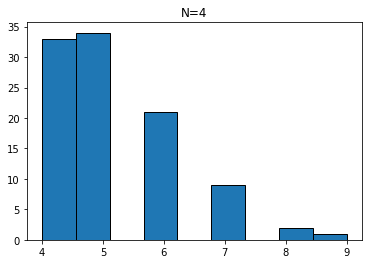

Mean =  5.16


In [22]:
import matplotlib.pyplot as plt

plt.title('N=4')
plt.hist(iterator, bins =9, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.grid(True)
plt.show()
print("Mean = ",mean/100)


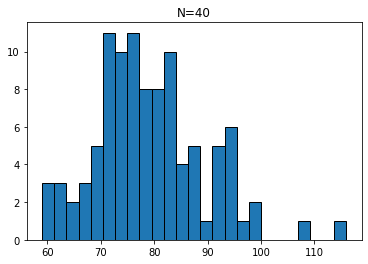

Mean =  79.24


In [23]:
import matplotlib.pyplot as plt

plt.title('N=40')
plt.hist(iterator2 ,bins =25,alpha=1, edgecolor = 'black',  linewidth=1)
#plt.grid(True)
plt.show()
print("Mean = ",mean2/100)
